<a href="https://colab.research.google.com/github/catedra-iq/cinetica_st/blob/main/resolvedor_cinetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving practica8362720.csv to practica8362720 (13).csv
Saving practica3080652.csv to practica3080652 (11).csv
Saving practica52331.csv to practica52331 (10).csv
Saving practica7270921.csv to practica7270921 (7).csv
Saving practica6673851.csv to practica6673851 (7).csv
Saving practica1285922.csv to practica1285922 (4).csv
Saving practica900572.csv to practica900572 (3).csv


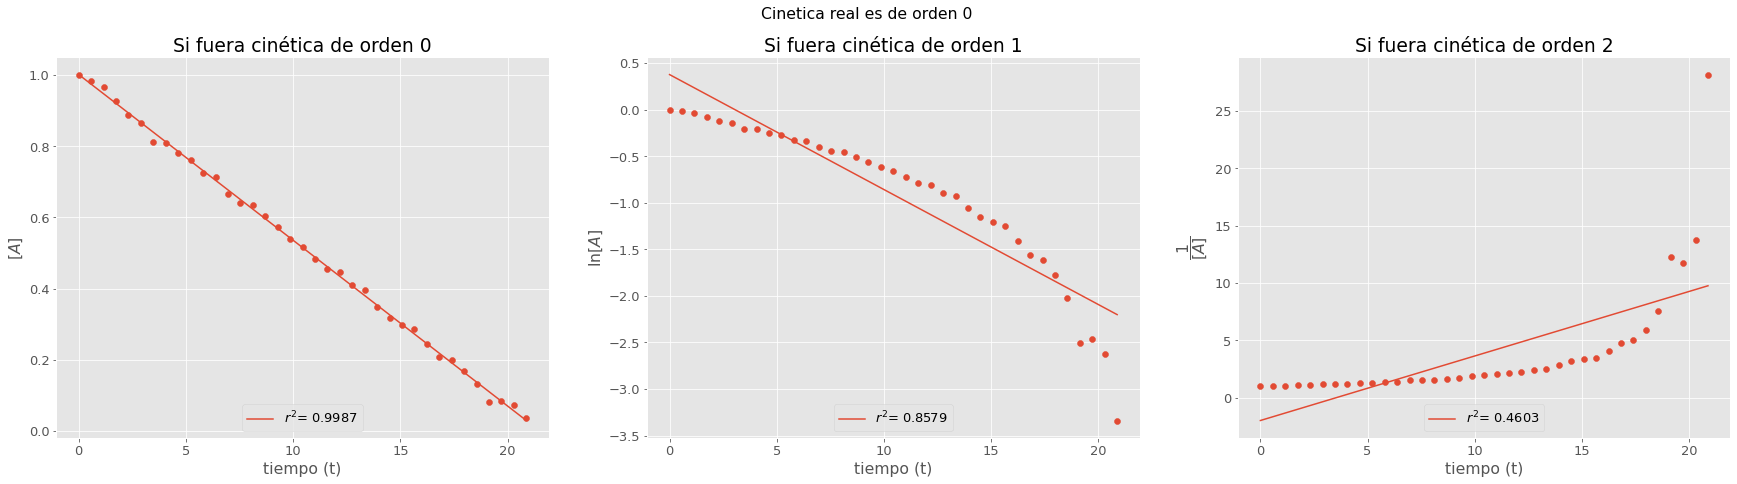

##$$ k=-0.0466, [A]_0 = 1.0014$$

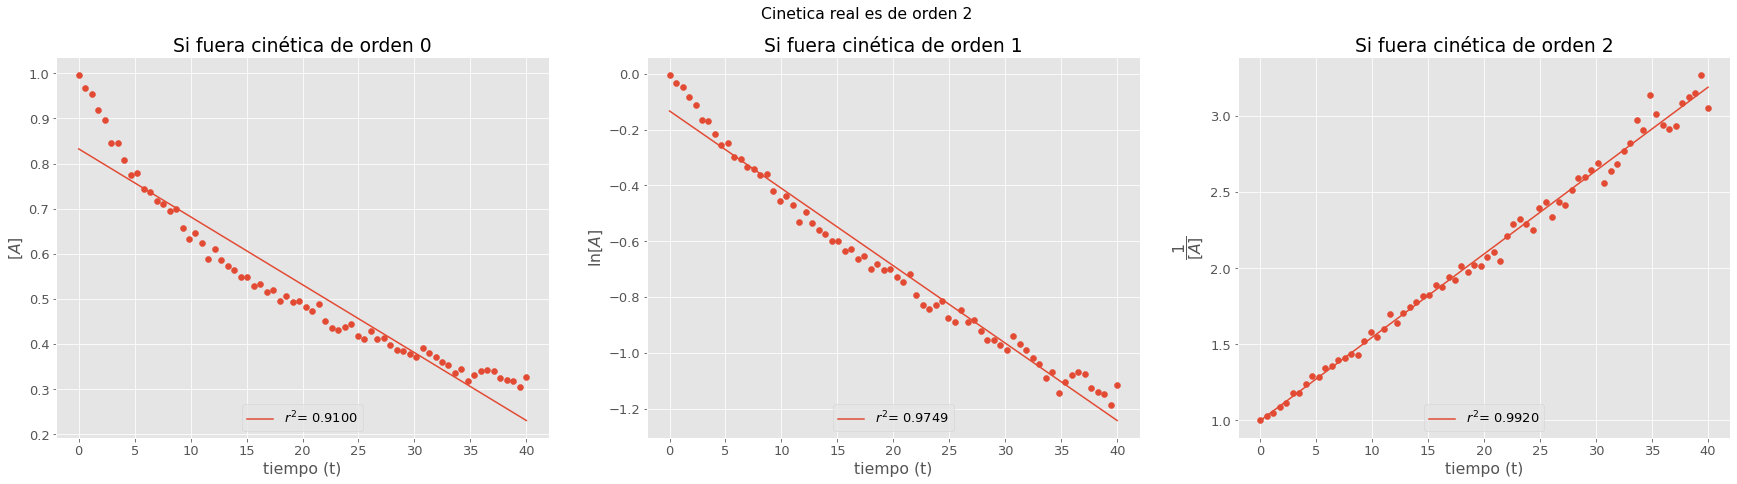

##$$k=0.0547, \dfrac{1}{[A]_0}= 1.00$$

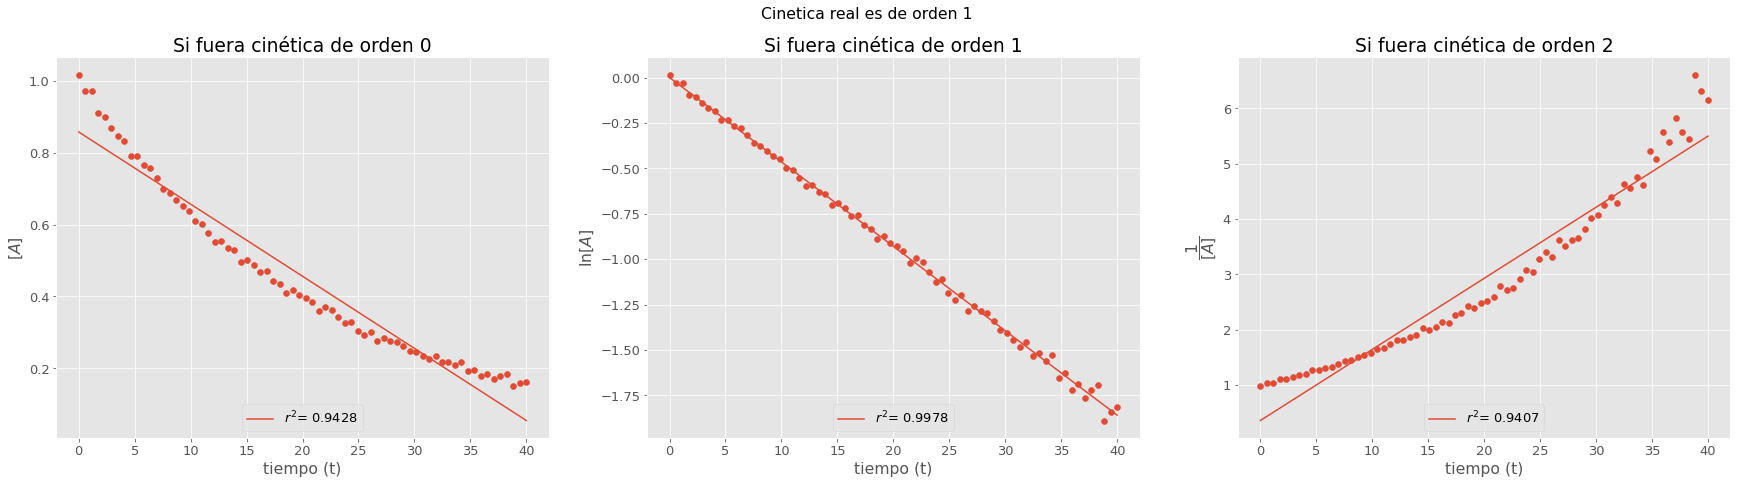

##$$k=-0.0465 , \ln{[A]_0} = 0.0003$$

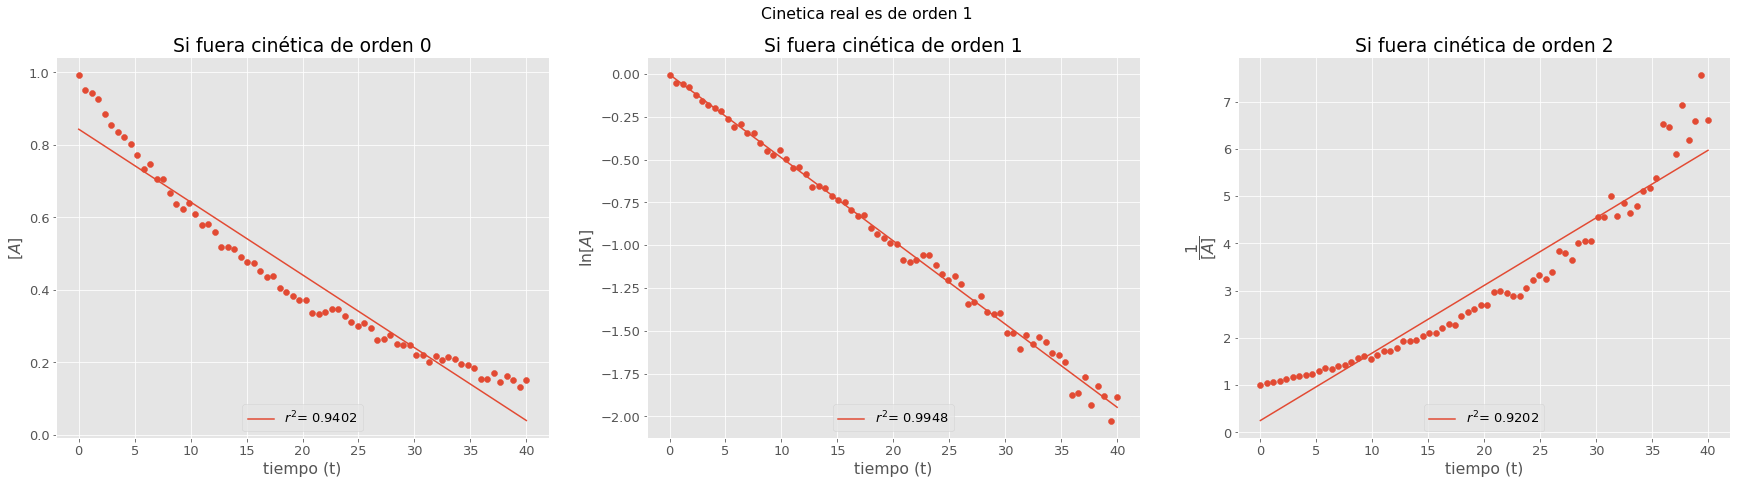

##$$k=-0.0486 , \ln{[A]_0} = -0.0038$$

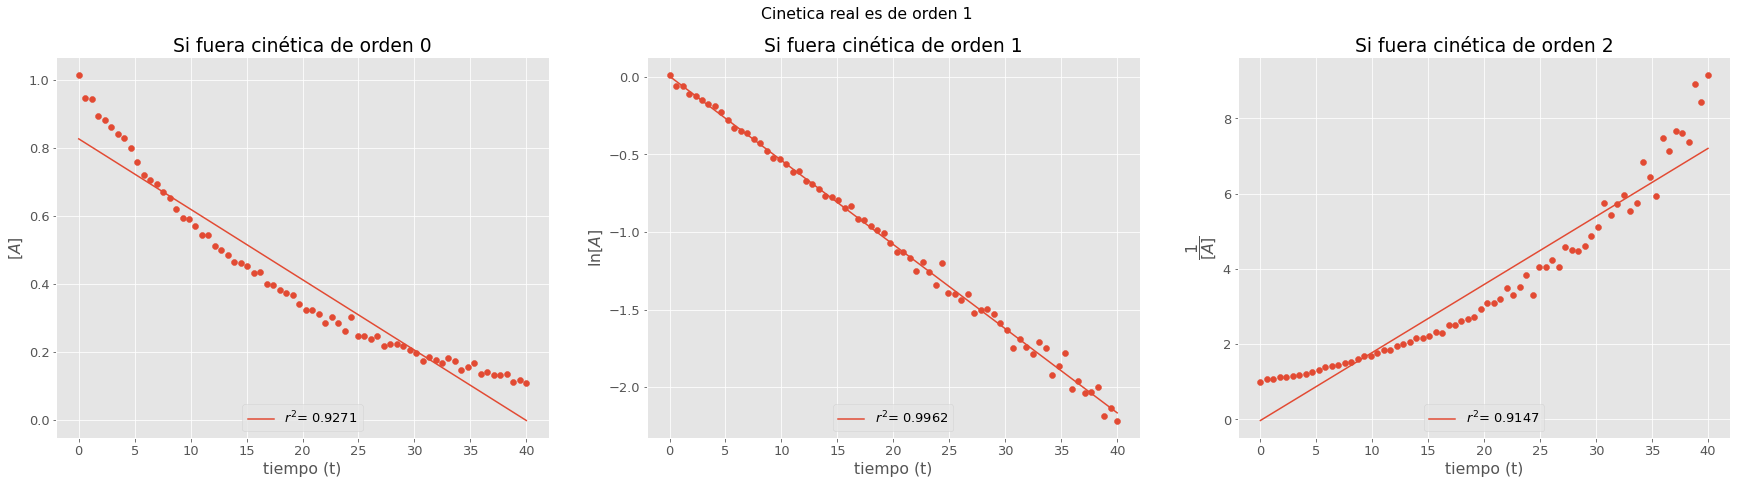

##$$k=-0.0543 , \ln{[A]_0} = 0.0042$$

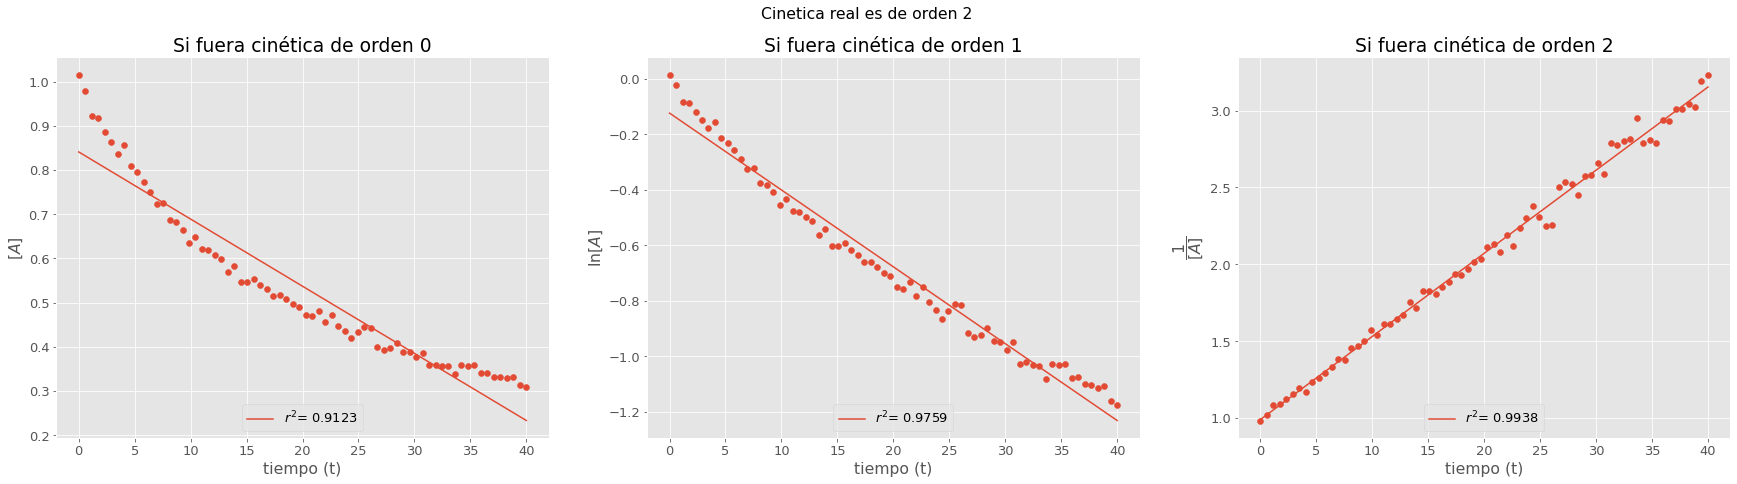

##$$k=0.0541, \dfrac{1}{[A]_0}= 0.99$$

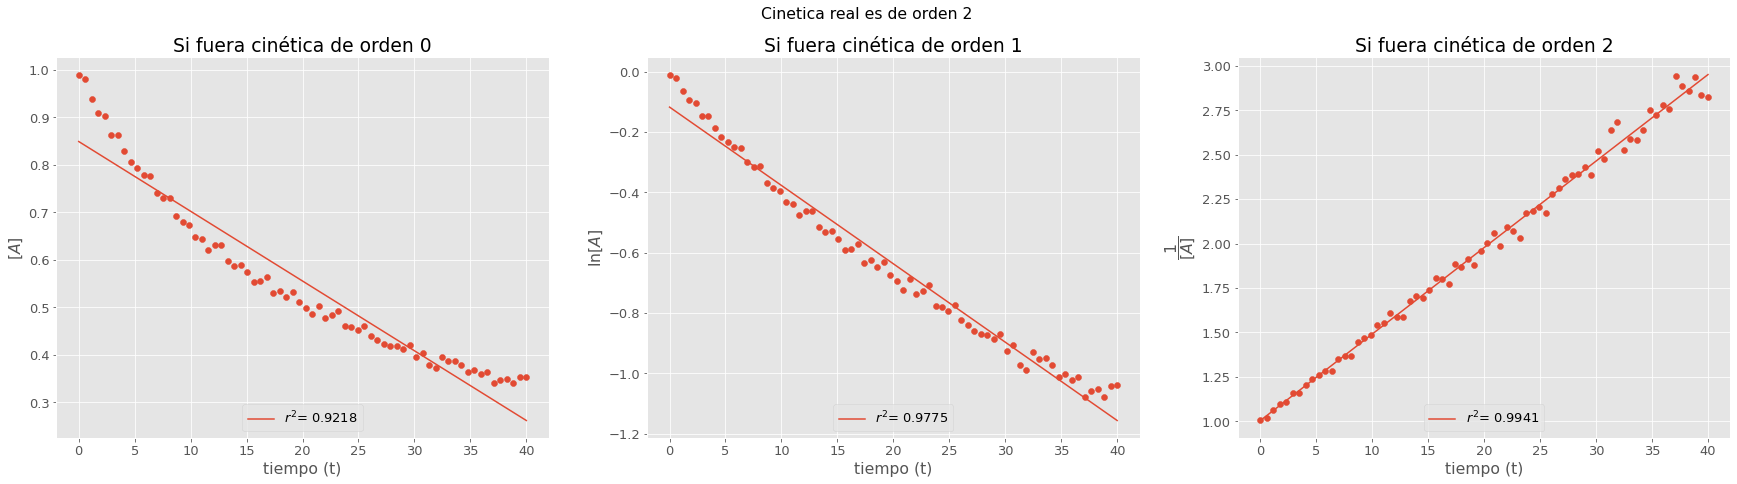

##$$k=0.0486, \dfrac{1}{[A]_0}= 1.00$$

In [62]:
#@title Resolvedor de ejercicio de cinetica para docentxs {display-mode: "form"}
#@markdown Para develar la respuesta al ej. hacer clic en `Entorno de ejecución> Ejecutar todo` y subir \
#@markdown el/los archivo/s a corregir en el campo que se habilitará pocos segundos después. \ 
#@markdown No es recomendable subir mas de dos o tres archivos juntos. \
#@markdown Cada vez que quieran cargar archivos nuevos tienen que repetir el paso indicado arriba. 
# This code will be hidden when the notebook is loaded.
from google.colab import files
uploaded_files=files.upload()
import pandas as pd
from IPython.display import display as d 
from IPython.display import Markdown as md
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
ylabels=[r'$[A]$',r'$\ln{[A]}$', r'$\dfrac{1}{[A]}$']
eqs=[r'##$$ k=%.4f, [A]_0 = %.4f$$',r'##$$k=%.4f , \ln{[A]_0} = %.4f$$', r'##$$k=%.4f, \dfrac{1}{[A]_0}= %.2f$$']

plt.style.use('ggplot')
plt.rcParams.update({
    'font.size':13
})
for file in uploaded_files:
  r2s=[]
  params=[]
  tiempo, concentracion=pd.read_csv(file).to_numpy().T
  fig,ax=plt.subplots(1,3,figsize=(30,7))
  plt.suptitle('Cinetica real es de orden {}'.format(file[-5]))
  lr=LinearRegression()
  concentraciones=[concentracion, np.log(concentracion), (1/concentracion)]
  for i in range(3):
    ax[i].scatter(tiempo, concentraciones[i])
    ax[i].set_title('Si fuera cinética de orden {}'.format(i))
    ax[i].set_xlabel('tiempo (t)')
    ax[i].set_ylabel(ylabels[i])
    lr.fit(tiempo.reshape(-1,1), concentraciones[i].reshape(-1,1))
    y_fit=tiempo*lr.coef_[0] + lr.intercept_
    r2=r2_score(concentraciones[i], y_fit)
    r2s.append(r2)
    params.append((lr.coef_[0], lr.intercept_))
    ax[i].plot(tiempo, y_fit, label=r'$r^2$= {:.4f}'.format(r2))
    ax[i].legend(loc='lower center')
    

  plt.show()
  am=int(np.argmax(r2s))
  d(md(eqs[am]%(params[am])))